# Birth and death dates of US singers



It's a standard of statistics that athlete's birthdays aren't uniformly distributed over a year.

#### What about singers?

data source: https://en.wikipedia.org/wiki/Category:20th-century_American_singers

#### What about their death dates? 

The question here is a commercial one: <br>
Do the deaths of performing artists die occur more frequently **just** before Xmas? <br>

This would be advatageous for their record company given the expected peak in sales over the "giving season".




In [19]:
import urllib2,sys,re
pp = re.compile('<a href="/wiki/(.*?)"')
from string import uppercase

In [20]:
uppercase

'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [29]:
url = "https://en.wikipedia.org/wiki/Category:20th-century_American_singers"

lks = []
for x in uppercase[:]:
    #generate a request string 
    qq = '?from=%s'%x
    mm = pp.findall(urllib2.urlopen(url + qq).read())
    if mm : 
        #don't need to filter much 
        #wiki uses ':' to indicate links structural stuff
        #e.g. "/wiki/Help:Category"
        lks.extend([x for x in mm if ':' not in x][:-1])


In [ ]:
#lks

In [47]:
lks = list(set(lks))

Don't really need BS to extract the dates 
regexps suffice.

In [35]:
pbd = re.compile(r'<span class="bday">(.*?)<')
pdd = re.compile(r'<span class="dday.*?">(.*?)<')

In [52]:
def fudge(x):
    if x : return x.group(1)
    return None

stuff = []
for lk in lks[1325:]:
    mdata = urllib2.urlopen('https://en.wikipedia.org/wiki/%s'%lk).read()
    death = pdd.search(mdata)
    birth = pbd.search(mdata)
    
    stuff.append([lk, [fudge(x) for x in [birth,death] ] ] )
                  

KeyboardInterrupt: 

This is the trace when I got tired after more 
than 30 minutes of pulling pages (I got 1326).

In [65]:
len(stuff)
#backup because I might relaunch the robot later
stuff_bak = stuff[:]

In [67]:
def date2month(date):
    if not date: return None
    yyyy,mm,dd = date.split('-')
    return int(mm)

months = [(date2month(x[1][0]), date2month(x[1][1])) for x in stuff]

In [83]:
births,deaths = zip(*months)

In [84]:
def freqs(L):
    LL = [x for x in L if x]
    return [LL.count(i) for i in range(1,13)]

births_freqs = freqs(births)
deaths_freqs = freqs(deaths)

In [85]:
deaths_freqs, births_freqs

([67, 55, 61, 56, 59, 53, 59, 55, 40, 56, 52, 61],
 [95, 68, 59, 72, 76, 87, 73, 64, 75, 89, 57, 88])

Let's look at longevity too

In [102]:
def date2year(date):
    if not date: return None
    yyyy,mm,dd = date.split('-')
    return int(yyyy)

def life_span(x):
    a,b = x
    if not(a and b): return None
    return b - a

years = [[date2year(date) for date in x[1]] for x in stuff]


In [105]:
ages = [life_span(x) for x in years]
ages = [x for x in ages if x]

In [107]:
sum(ages)/float(len(ages))

63.8411214953271

In [117]:
cc = [x/5 for x in ages]
ff = [(5*i, cc.count(i)) for i in range(21)]

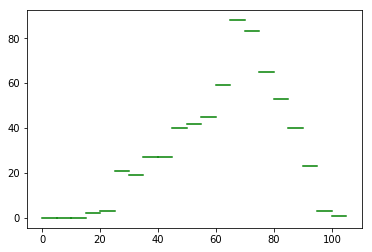

In [124]:
for x,y in ff:
    plt.plot([x,x+5],[y,y],'g-')

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

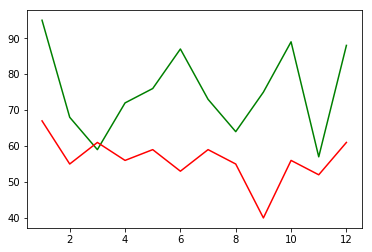

In [87]:
plt.plot(range(1,13), births_freqs,'g-')
plt.plot(range(1,13), deaths_freqs,'r-')

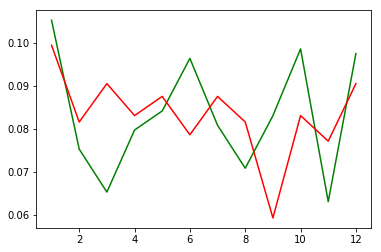

In [101]:
def normalize(FF):
    S = float(sum(FF))
    return [x/S for x in FF]

plt.plot(range(1,13), normalize(births_freqs),'g-')
plt.plot(range(1,13), normalize(deaths_freqs),'r-')

Dump to a csv file for later use. 

- I could just pickle the object **stuff** too.
- But maybe I want to share the csv on github

In [100]:
import csv

with open('singers.csv', 'wb') as csvfile:
    spamwriter = csv.writer(csvfile)
    for x in stuff:
        name,dates = x
        row = [name, dates[0], dates[1]]
        spamwriter.writerow(row)
        